In [36]:
import pickle
import netwulf as nw
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Part 2: Communities

Exercise 2: Zachary's karate club: In this exercise, we will work on Zarachy's karate club graph (refer to the Introduction of Chapter 9). The dataset is available in NetworkX, by calling the function karate_club_graph

Ex 1: Visualize the graph using netwulf. Set the color of each node based on the club split (the information is stored as a node attribute). My version of the visualization is below. 

In [37]:
G_karate = nx.karate_club_graph()

In [38]:
#  Set the color of each node based on the club split (the information is stored as a node attribute) 
for node in G_karate.nodes():  # Iterate through all nodes in the graph 
    if G_karate.nodes[node]['club'] == 'Mr. Hi':  # If the node belongs to Mr. Hi's club, set its color to blue 
        G_karate.nodes[node]['color'] = 'blue'  
    else:  # Otherwise, set its color to red 
        G_karate.nodes[node]['color'] = 'red'

In [58]:
# Visualize the graph with netwulf    
#nw.visualize(G_karate, config={'node_color': 'color', 'edge_width': 0.5}, plot_in_cell_below=True)

Ex 2: Write a function to compute the modularity of a graph partitioning (use equation 9.12 in the book). The function should take a networkX Graph and a partitioning as inputs and return the modularity.

In [41]:
def compute_modularity(G, communities):
    L = sum(dict(G.degree(weight="weight")).values())/2
    modularity = 0
    for i in communities:
        Lc = 0
        kc = 0
        for node in i:
            degree = G.degree[node]
            kc += degree
            for neighbor in G.neighbors(node):
                if neighbor in i:
                    Lc += 1
        modularity += (Lc/L - ((kc/(2*L))**2))
    return modularity

Ex 3: Explain in your own words the concept of modularity.

Ex 4: Compute the modularity of the Karate club split partitioning using the function you just wrote. Note: the Karate club split partitioning is avilable as a node attribute, called "club".

In [42]:
print("Out modularity:", compute_modularity(G_karate, communities=nx.algorithms.community.greedy_modularity_communities(G_karate)))

Out modularity: 0.4679822342160005


In [43]:
print("Networkx modularity:", nx.algorithms.community.modularity(G_karate, communities = nx.algorithms.community.greedy_modularity_communities(G_karate)))

Networkx modularity: 0.41096493693896297


## alt mellem her:

In [44]:
def Partitioning(G_karate):
    dict_karate = nx.get_node_attributes(G_karate, name='club')
    bool_karate = np.array(list(dict_karate.values())) == 'Officer'
    officer = np.array(list(dict_karate.keys()))[bool_karate]
    mrHi = np.array(list(dict_karate.keys()))[~bool_karate]
    return [list(officer),list(mrHi)]

In [46]:
print("Networkx modularity:", nx.algorithms.community.modularity(G_karate, communities = club_per))

Networkx modularity: 0.39143756676224206


In [47]:
print("Out modularity:", compute_modularity(G_karate, communities=club_per))

Out modularity: 0.5229943216956204


## til her, er test

Ex 5: We will now perform a small randomization experiment to assess if the modularity you just computed is statitically different from 0. To do so, we will implement the double edge swap algorithm. The double edge swap algorithm is quite old... it was implemented in 1891 (!) by Danish mathematician Julius Petersen(https://en.wikipedia.org/wiki/Julius_Petersen). Given a network G, this algorithm creates a new network, such that each node has exactly the same degree as in the original network, but different connections. Here is how the algorithm works.

In [48]:
def double_swap(G, N):
    #Make a copy of the graph 
    H = G.copy() 
    
    for i in range(N): 
        
        #select two random edges from the graph H 
        t, s = random.sample(H.edges(), 2)
        
        u, v = t
        x, y = s

        if len(set([u,v,x,y])) != 4:
            continue

        if H.has_edge(u,y) or H.has_edge(x,v):
            continue                                                                      

        H.remove_edges_from([t, s]) #remove edges from the graph H 
        H.add_edges_from([(u,y), (x,v)]) #add new edges to the graph H    

        print("Edge swapped between",u,"-",v,"and",x,"-",y)
    return H

In [49]:
H = double_swap(G_karate, len(G_karate.edges()) + 2)

Edge swapped between 1 - 3 and 6 - 16
Edge swapped between 25 - 31 and 9 - 33
Edge swapped between 0 - 7 and 15 - 32
Edge swapped between 0 - 2 and 22 - 33
Edge swapped between 26 - 29 and 2 - 28
Edge swapped between 7 - 15 and 8 - 32
Edge swapped between 24 - 31 and 5 - 10
Edge swapped between 31 - 33 and 24 - 25
Edge swapped between 15 - 33 and 5 - 16
Edge swapped between 30 - 33 and 9 - 31
Edge swapped between 1 - 13 and 5 - 6
Edge swapped between 1 - 17 and 18 - 33
Edge swapped between 29 - 32 and 3 - 6
Edge swapped between 8 - 15 and 0 - 17
Edge swapped between 8 - 33 and 10 - 24
Edge swapped between 2 - 29 and 20 - 33
Edge swapped between 6 - 29 and 0 - 31
Edge swapped between 5 - 33 and 3 - 32
Edge swapped between 1 - 33 and 30 - 32
Edge swapped between 29 - 33 and 5 - 31
Edge swapped between 8 - 17 and 5 - 32
Edge swapped between 3 - 12 and 17 - 18
Edge swapped between 26 - 28 and 2 - 7
Edge swapped between 22 - 32 and 25 - 31
Edge swapped between 2 - 8 and 15 - 16
Edge swapped

C:\Users\Mathias\AppData\Local\Temp\ipykernel_13792\1755545155.py:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  t, s = random.sample(H.edges(), 2)


Ex 6: Double check that your algorithm works well, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.

In [50]:
#Get the degree of each node in the original network and the randomized network:
original_degree = dict(G_karate.degree).items()
randomized_degree = dict(H.degree).items() 

# Check that the degrees are equal or not  
if original_degree == randomized_degree: 
    print("The degree of nodes in both networks are equal")
else:
    print("The degree of nodes in both networks are NOT equal")

The degree of nodes in both networks are equal


Ex 7: Create 1000 randomized version of the Karate Club network using the double edge swap algorithm you wrote in step 5. For each of them, compute the modularity of the "club" split and store it in a list.

In [52]:
q_list = []
for i in range(1000):
    G_double = double_swap(G_karate, len(G_karate.edges()) + 2)
    #communities = nx.algorithms.community.greedy_modularity_communities(G_double)
    #q = compute_modularity(G_double, communities=communities)
    communities = Partitioning(G_double)
    q = nx.algorithms.community.modularity(G_double, communities = communities)
    q_list.append(q)

C:\Users\Mathias\AppData\Local\Temp\ipykernel_13792\1755545155.py:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  t, s = random.sample(H.edges(), 2)


Edge swapped between 2 - 28 and 8 - 33
Edge swapped between 5 - 16 and 1 - 21
Edge swapped between 24 - 27 and 20 - 32
Edge swapped between 1 - 19 and 23 - 33
Edge swapped between 0 - 3 and 26 - 29
Edge swapped between 3 - 13 and 24 - 31
Edge swapped between 30 - 32 and 4 - 6
Edge swapped between 0 - 10 and 26 - 33
Edge swapped between 14 - 33 and 6 - 30
Edge swapped between 13 - 24 and 0 - 7
Edge swapped between 31 - 33 and 5 - 6
Edge swapped between 23 - 25 and 5 - 10
Edge swapped between 6 - 31 and 15 - 32
Edge swapped between 18 - 33 and 10 - 23
Edge swapped between 31 - 32 and 9 - 33
Edge swapped between 18 - 23 and 5 - 21
Edge swapped between 3 - 26 and 23 - 29
Edge swapped between 4 - 10 and 1 - 7
Edge swapped between 20 - 27 and 5 - 25
Edge swapped between 23 - 27 and 28 - 31
Edge swapped between 0 - 12 and 4 - 7
Edge swapped between 9 - 32 and 0 - 7
Edge swapped between 5 - 33 and 24 - 25
Edge swapped between 14 - 30 and 0 - 2
Edge swapped between 8 - 28 and 5 - 27
Edge swappe

In [53]:
print(q_list)

[0.18135904499540864, 0.23138503086419754, 0.22592342722212855, 0.22936449963476993, 0.2759111111111111, 0.19695992858559813, 0.2631225030655433, 0.275684113865932, 0.20841854934601664, 0.2586131877694711, 0.2430314429012346, 0.25186709343087943, 0.25837399136798644, 0.26156747511074074, 0.20161205629069526, 0.26486755540166207, 0.29252861602497404, 0.2689518151305891, 0.20382860543542947, 0.25218314372696693, 0.28049671292914535, 0.26422476586888655, 0.23816494752488623, 0.22766784169203658, 0.26570981466086363, 0.24350756081525304, 0.2193209461208012, 0.2459889285044098, 0.2962772443225118, 0.22058947545960536, 0.2184749258085609, 0.2389111111111111, 0.29478961209730437, 0.23080737948819677, 0.28377914951989025, 0.27708211341831446, 0.13221583019242214, 0.2140313188987506, 0.1865701249752033, 0.29754818594104304, 0.2792640673654664, 0.20354340071343635, 0.22744696492333544, 0.2634929207978087, 0.18131391526661794, 0.26420044864605036, 0.20579691571617753, 0.2285119667013527, 0.214778

Ex 8: Compute the average and standard deviation of the modularity for the random network.

In [54]:
# Compute the average and standard deviation of the modularity for the random network.
print("Average:", np.mean(q_list))
print("Standard Deviation:", np.std(q_list))

Average: 0.2356552560952677
Standard Deviation: 0.0373198886800773


Ex 9: Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use axvline).

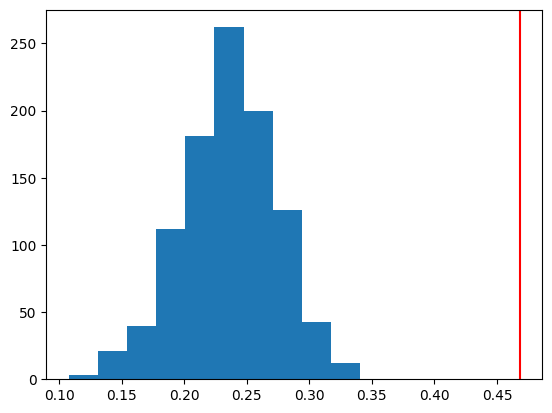

In [55]:
# Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use axvline).
plt.hist(q_list)
plt.axvline(compute_modularity(G_karate, communities=nx.algorithms.community.greedy_modularity_communities(G_karate)),color="red")
plt.show()

Ex 10: Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?

Ex 11: Use the Python Louvain-algorithm implementation to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?

Ex 12: Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix D with dimension (2 times A), where A is the number of communities found by Louvain. We set entry D(i,j) to be the number of nodes that community i has in common with group split j. The matrix D is what we call a confusion matrix. Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.